# Probability plotting

In [179]:
%matplotlib inline
import numpy as np
from scipy.stats import gumbel_r
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Read the text file

In [101]:
with open("data_q3-2.txt", "r") as f:
    test = [i for line in f for i in line.split('\t')]

## Use strip() to remove '\n'

In [140]:
mylist = list(map(lambda test: test.strip(), test))
n = len(mylist)

In [177]:
# Sort the sample data
arr = np.array([float(x) for x in mylist])
arr_sorted = np.sort(arr)

In [192]:
#arr.reshape(-1, 1)

## Steps for probability plotting (quantile-quantile plot)

With the sample $\{x_n\}$, we aim to draw the probability plots of Gumbel distribution.

Here are the steps of producing the probability plot:

1. Ordered the sample data $x_1,x_2,...,x_n$
2. Compute $z_i = G^{-1}[F_n(x_i)]$ on $x_i$, where $G$ is the target probability distribution (Gumbel) and empirical cdf $F_n(x_i) = \frac{i-0.5}{n}, n=1,2,...,n$
3. Fitted a regression line for $x_i$ on $z_i$ and added to the scatter plot


In [214]:
# Empirical cdf
ecdf = []
for i in np.arange(1,n+1,1):
    ecdf.append((i-0.5)/n)
z = gumbel_r.ppf(ecdf) # quantiles for gumbel distribution

In [215]:
# Regress sorted data on z
lm = LinearRegression()
lm.fit(np.reshape(z1,(len(z1),1)), np.reshape(arr_sorted,(len(arr_sorted),1)));

In [216]:
print(lm.intercept_)
print(lm.coef_)

[99.13881706]
[[31.01433821]]


## Probability plot 

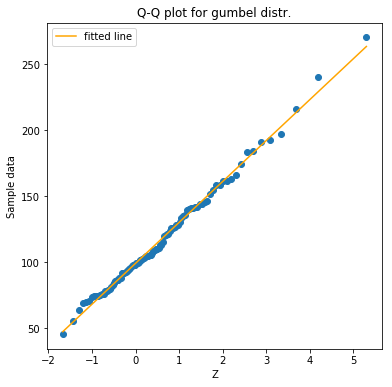

In [218]:
plt.figure(figsize=[6,6]) 
plt.scatter(z, arr_sorted)

# The fitted regression line
f = lambda x: 31.0143*x + 99.1388
x = np.array([min(z),max(z)])
plt.plot(x,f(x), c="orange", label="fitted line")

plt.xlabel('Z')
plt.ylabel('Sample data')
plt.title('Q-Q plot for gumbel distr.')
plt.legend()
plt.show();

[nbviewer for Q3-2](https://nbviewer.jupyter.org/github/roam041/Q3-2/blob/master/Q3-2.ipynb)